# Stock Price Prediction – Machine Learning Project in Python

Machine learning can be used to predict how stocks will perform. In this project, we'll focus on predicting whether a stock's value will go up or down. This task is challenging and comes with some uncertainty. We'll split this project into two main parts to make it easier to understand and work on.

1. First, we will learn how to predict stock price using the LSTM neural network.
2. Then we will build a dashboard using Plotly dash for stock analysis.

#### What is LSTM :- 

An LSTM (Long Short-Term Memory) neural network model in machine learning is like a super-smart diary or journal that helps you remember important things over time.

Imagine you're trying to predict the weather every day. You want to know if it will be sunny, rainy, or cloudy based on past observations. You could keep a regular diary where you write down the weather and other details each day. However, an LSTM diary is much more advanced.

In this special diary, you not only write down the weather but also note how the weather has been changing over the past few days. For example, you remember that it was sunny for the last three days, and then it rained yesterday. With this LSTM diary, you can make better predictions because it remembers these patterns and understands that there might be a higher chance of rain after several sunny days.

In the world of machine learning, an LSTM neural network works similarly. It's like a smart diary for the computer. It's designed to remember and understand patterns in data over time, making it especially useful for tasks like predicting stock prices, where the past history of prices is essential for making accurate forecasts.

#### Dashboard:-
Creating a Plotly Dash dashboard for stock analysis allows you to visualize and interact with stock market data for informed decision-making.

### 1. Import all library

In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
!pip install  scikit-learn 

In [4]:
!pip install --upgrade scikit-learn


In [5]:
!pip install klib

In [11]:
pip install matplotlib --force-reinstall


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Payal\\anaconda3\\Lib\\site-packages\\~-l\\_imaging.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/16/09/989b982322439faa4bafffcd669e6f942b38fee897c2664c987bcd091dec/contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.1.0-cp311-cp311-win_amd64.whl.metadata (5.7 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/95/b6/9a5133deb5838c4dbe3ea27e8dba123622aa5112d43a079e9587636b4faf/fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata
  Using cached fonttools-4.42.1-cp311-cp311-win_amd64.whl.metadata (154 kB)
  Obtaining dependency information for kiwisolver>=1.0.1 from h

In [12]:
conda install freetype --force-reinstall


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Payal\anaconda3

  added / updated specs:
    - freetype






Preparing transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:

In [6]:
import os
# Now i can use functions and classes from the os module

In [7]:
!pip install matplotlib
!pip install --upgrade matplotlib

In [10]:
import numpy as np
import pandas as pd

%matplotlib inline 
from matplotlib.pyplot import rcParams
rcParams["figure.figsize"]=20,10

from tensorflow.keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


### 2. Read the dataset:



In [15]:
os.getcwd()

'C:\\Users\\Payal'

In [16]:
os.chdir("D:\\Internship\\Bharat intern\\NSE-Tata-Global-Beverages-Limited")

In [17]:
df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")

In [13]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [18]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [20]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [21]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### 3. Analyze the closing prices from dataframe:



In [22]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [23]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")

In [24]:
df.index=df["Date"]

In [25]:
pip install --upgrade matplotlib


Note: you may need to restart the kernel to use updated packages.


<function matplotlib.pyplot.show(close=None, block=None)>

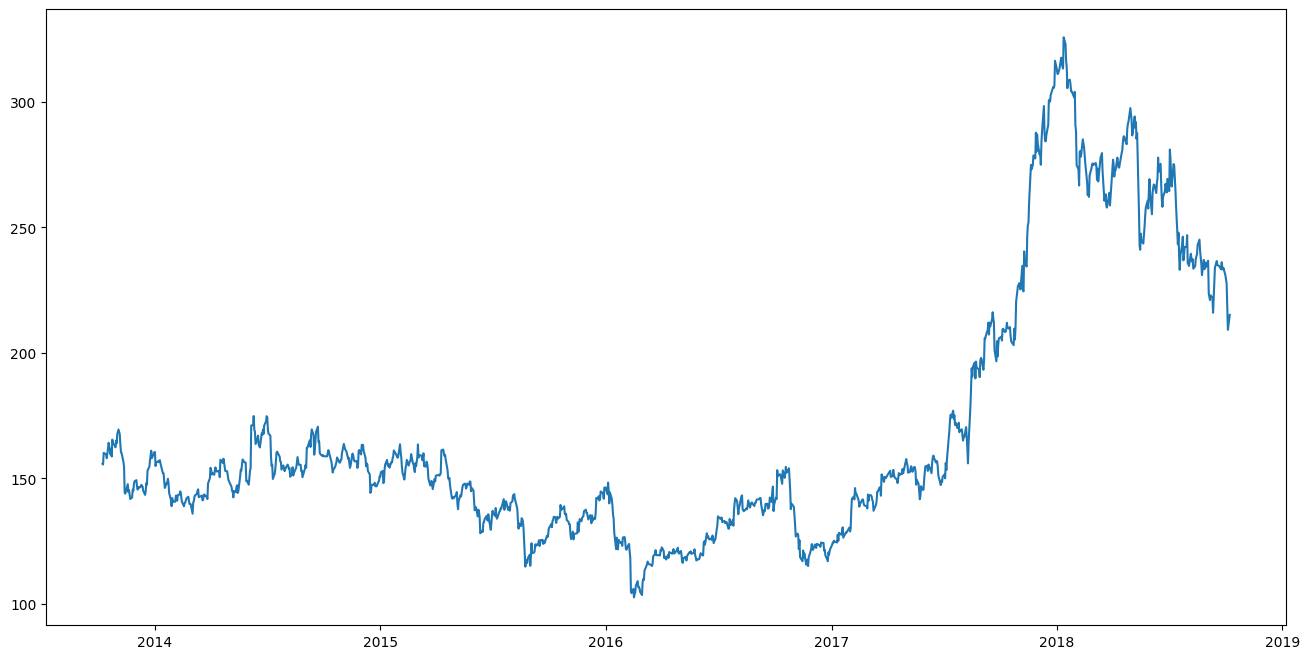

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label="Close Price History")
plt.show


#### In 2018, the closing price of the stock showed a significant upward trend, indicating a period of relatively high prices.

### 4. Sort the dataset on date time and filter “Date” and “Close” columns:

In [26]:
data= df.sort_index(ascending=True,axis=0)

In [27]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79


In [28]:
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=["Date","Close"])

In [29]:
new_dataset

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1230,NaN,NaN
1231,NaN,NaN
1232,NaN,NaN
1233,NaN,NaN


In [30]:
for i in range(0,len(data)):
    new_dataset["Date"][i]=data["Date"][i]
    new_dataset["Close"][i]=data["Close"][i]


In [31]:
new_dataset

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


In [32]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1235 non-null   object
 1   Close   1235 non-null   object
dtypes: object(2)
memory usage: 19.4+ KB


### 5. Normalize the new filtered dataset:



In [34]:
from sklearn.preprocessing import MinMaxScaler


In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
finale_dataset = new_dataset.values

In [36]:
finale_dataset

array([[Timestamp('2013-10-08 00:00:00'), 155.8],
       [Timestamp('2013-10-09 00:00:00'), 155.55],
       [Timestamp('2013-10-10 00:00:00'), 160.15],
       ...,
       [Timestamp('2018-10-04 00:00:00'), 218.2],
       [Timestamp('2018-10-05 00:00:00'), 209.2],
       [Timestamp('2018-10-08 00:00:00'), 215.15]], dtype=object)

In [38]:
train_data = finale_dataset[0:987, :]
valid_data = finale_dataset[987:, :]


In [39]:
train_data

array([[Timestamp('2013-10-08 00:00:00'), 155.8],
       [Timestamp('2013-10-09 00:00:00'), 155.55],
       [Timestamp('2013-10-10 00:00:00'), 160.15],
       ...,
       [Timestamp('2017-10-04 00:00:00'), 204.95],
       [Timestamp('2017-10-05 00:00:00'), 209.45],
       [Timestamp('2017-10-06 00:00:00'), 209.6]], dtype=object)

In [41]:
valid_data

array([[Timestamp('2017-10-09 00:00:00'), 208.3],
       [Timestamp('2017-10-10 00:00:00'), 208.45],
       [Timestamp('2017-10-11 00:00:00'), 209.4],
       [Timestamp('2017-10-12 00:00:00'), 212.0],
       [Timestamp('2017-10-13 00:00:00'), 210.25],
       [Timestamp('2017-10-16 00:00:00'), 209.6],
       [Timestamp('2017-10-17 00:00:00'), 210.3],
       [Timestamp('2017-10-18 00:00:00'), 206.8],
       [Timestamp('2017-10-19 00:00:00'), 204.6],
       [Timestamp('2017-10-23 00:00:00'), 203.1],
       [Timestamp('2017-10-24 00:00:00'), 209.65],
       [Timestamp('2017-10-25 00:00:00'), 205.3],
       [Timestamp('2017-10-26 00:00:00'), 209.8],
       [Timestamp('2017-10-27 00:00:00'), 220.5],
       [Timestamp('2017-10-30 00:00:00'), 226.8],
       [Timestamp('2017-10-31 00:00:00'), 226.95],
       [Timestamp('2017-11-01 00:00:00'), 227.8],
       [Timestamp('2017-11-02 00:00:00'), 226.35],
       [Timestamp('2017-11-03 00:00:00'), 225.3],
       [Timestamp('2017-11-06 00:00:00'), 234

In [42]:
new_dataset.index = new_dataset.Date

In [43]:
new_dataset

,Date,Close
Date,,
2013-10-08,2013-10-08 00:00:00,155.8
2013-10-09,2013-10-09 00:00:00,155.55
2013-10-10,2013-10-10 00:00:00,160.15
2013-10-11,2013-10-11 00:00:00,160.05
2013-10-14,2013-10-14 00:00:00,159.45
...,...,...
2018-10-01,2018-10-01 00:00:00,230.9
2018-10-03,2018-10-03 00:00:00,227.6
2018-10-04,2018-10-04 00:00:00,218.2


In [44]:
new_dataset.drop("Date", axis=1, inplace=True)

In [45]:
new_dataset

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [46]:
# # Extract the Timestamps and values
# timestamps = finale_dataset[:, 0]
# values = finale_dataset[:, 1].astype(float)  # Ensure values are floats

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Fit and transform the numeric values (closing prices)
# scaled_values = scaler.fit_transform(values.reshape(-1, 1))

# # Combine Timestamps and scaled values
# scaled_data = np.column_stack((timestamps, scaled_values))


In [47]:
from sklearn.preprocessing import MinMaxScaler

# 'finale_dataset' is a NumPy array where the first column is Timestamps and the second column is numeric values
timestamps = finale_dataset[:, 0]
numeric_values = finale_dataset[:, 1].astype(float)  # Ensure values are floats

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the numeric values
scaled_numeric_values = scaler.fit_transform(numeric_values.reshape(-1, 1))

# Combine Timestamps and scaled numeric values
scaled_data = np.column_stack((timestamps, scaled_numeric_values))


In [48]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

### 6. Build and train the LSTM model:



In [64]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [54]:
# # Assuming 'new_dataset' contains your DataFrame
# # Access the 'Date' column (which is the index) using .index
# timestamps = new_dataset.index

# # Access the 'Close' column for numeric values
# numeric_values = new_dataset['Close'].values

# # Reshape the numeric values
# numeric_values = numeric_values.reshape(-1, 1)

# # Scale the numeric values
# numeric_values = scaler.transform(numeric_values)

# # Create a TimeseriesGenerator for your data
# sequence_length = 60  # Adjust this based on your desired sequence length
# generator = TimeseriesGenerator(numeric_values, numeric_values, length=sequence_length, batch_size=1)

# # Build and compile your LSTM model
# lstm_model = Sequential()
# lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
# lstm_model.add(LSTM(units=50))
# lstm_model.add(Dense(1))
# lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# # Fit the model using the TimeseriesGenerator
# lstm_model.fit(generator, epochs=1, verbose=2)


1175/1175 - 103s - loss: 0.0021 - 103s/epoch - 88ms/step


In [69]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load your dataset into new_dataset

# Convert the dataset to a NumPy array
data_array = new_dataset.values

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_array)

# Define your input sequences and corresponding target values
sequence_length = 60  # You mentioned using a sequence length of 60
x_train_data, y_train_data = [], []

for i in range(len(scaled_data) - sequence_length):
    x_train_data.append(scaled_data[i:i+sequence_length])
    y_train_data.append(scaled_data[i+sequence_length])

# Convert the lists to NumPy arrays
x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)

# Build and train your LSTM model using the preprocessed data
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, data_array.shape[1])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)


1175/1175 - 66s - loss: 0.0026 - 66s/epoch - 56ms/step


### 7. Take a sample of a dataset to make stock price predictions using the LSTM model:



In [71]:
X_test = []

for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [72]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 [==============================] - 3s 35ms/step


### 8. Save the LSTM model:



In [57]:
lstm_model.save("saved_model.h5")

C:\Users\Payal\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 9. Visualize the predicted stock costs with actual stock costs:



C:\Users\Payal\AppData\Local\Temp\ipykernel_3536\107833647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


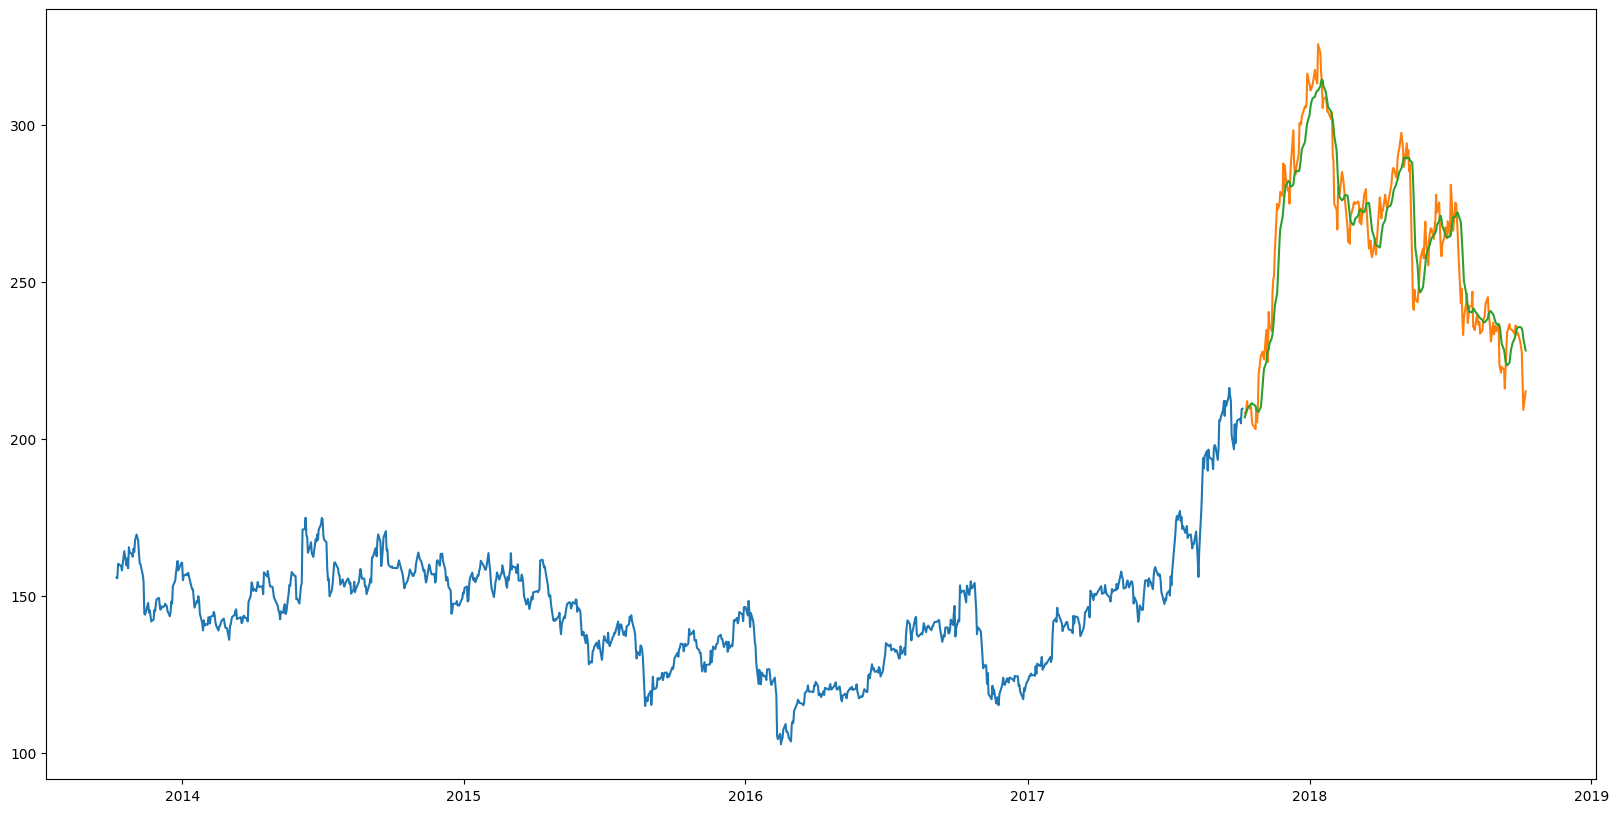

In [73]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

The main output we get from this project is a set of predicted stock prices for a specific period in the future. These predictions are generated by our LSTM neural network based on historical stock price data.

Here's what we typically receive as output:

**Predicted Stock Prices**: We obtain a list of estimated stock prices for each day or time period in the future that we want to predict. These are the values our model believes the stock prices will be.

**Accuracy Metrics**: Alongside the predictions, we often calculate accuracy metrics to assess how well our model is performing. These metrics help us understand the reliability of our predictions.

**Visualizations**: We may create charts or graphs that show both the actual historical stock prices and the predicted prices. This visual representation helps users understand how closely the predictions match the real data.

The primary goal is to provide reliable predictions of stock prices, which can be used by investors and traders to make informed decisions in the financial markets.

### You can see that the LSTM model's predictions closely match the actual stock prices.








# Build the dashboard using Plotly dash


In [74]:
!pip3 install dash
!pip3 install dash-html-components
!pip3 install dash-core-components

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/9b/b4/d522c16b41a8da013fd60a67f9618e57c504cd2c80e02a7a861413b93906/dash-2.13.0-py3-none-any.whl.metadata
  Using cached dash_html_components-2.0.0-py3-none-any.whl (4.1 kB)
  Using cached dash_core_components-2.0.0-py3-none-any.whl (3.8 kB)
  Using cached dash_table-5.0.0-py3-none-any.whl (3.9 kB)
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
  Using cached ansi2html-1.8.0-py3-none-any.whl (16 kB)
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.4 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.1/10.4 MB 1.1 MB/s eta 0:00:10
    --------------------------------------- 0.2/10.4 MB 1.0 MB/s eta 0:00:11
    --------------------------------------- 0.2/10.4 MB 958.4 kB/s eta 0:00:11
    --------------------------------------- 0.2/10.

In [75]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np


app = dash.Dash()
server = app.server

scaler=MinMaxScaler(feature_range=(0,1))

df_nse = pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")

df_nse["Date"]=pd.to_datetime(df_nse.Date,format="%Y-%m-%d")
df_nse.index=df_nse["Date"]


data=df_nse.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df_nse)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_data["Date"][i]=data['Date'][i]
    new_data["Close"][i]=data["Close"][i]

new_data.index=new_data.Date
new_data.drop("Date",axis=1,inplace=True)

dataset=new_data.values

train=dataset[0:987,:]
valid=dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train,y_train=[],[]

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model=load_model("saved_model.h5")

inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

train=new_data[:987]
valid=new_data[987:]
valid['Predictions']=closing_price





C:\Users\Payal\AppData\Local\Temp\ipykernel_3536\392076166.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Payal\AppData\Local\Temp\ipykernel_3536\392076166.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


8/8 [==============================] - 2s 33ms/step


C:\Users\Payal\AppData\Local\Temp\ipykernel_3536\392076166.py:68: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [76]:
os.getcwd()
os.chdir("D:\Internship\Bharat intern\stock_data")
df= pd.read_csv("stock_data.csv")

app.layout = html.Div([
   
    html.H1("Stock Price Analysis Dashboard", style={"textAlign": "center"}),
   
    dcc.Tabs(id="tabs", children=[
       
        dcc.Tab(label='NSE-TATAGLOBAL Stock Data',children=[
            html.Div([
                html.H2("Actual closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=train.index,
                                y=valid["Close"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                ),
                html.H2("LSTM Predicted closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=valid.index,
                                y=valid["Predictions"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                )                
            ])                


        ]),
        dcc.Tab(label='Facebook Stock Data', children=[
            html.Div([
                html.H1("Facebook Stocks High vs Lows", 
                        style={'textAlign': 'center'}),
              
                dcc.Dropdown(id='my-dropdown',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'}, 
                                      {'label': 'Facebook', 'value': 'FB'}, 
                                      {'label': 'Microsoft','value': 'MSFT'}], 
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto", 
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),
                html.H1("Facebook Market Volume", style={'textAlign': 'center'}),
         
                dcc.Dropdown(id='my-dropdown2',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'}, 
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}], 
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto", 
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container"),
        ])


    ])
])


@app.callback(Output('highlow', 'figure'),
              [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    trace2 = []
    for stock in selected_dropdown:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["High"],
                     mode='lines', opacity=0.7, 
                     name=f'High {dropdown[stock]}',textposition='bottom center'))
        trace2.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Low"],
                     mode='lines', opacity=0.6,
                     name=f'Low {dropdown[stock]}',textposition='bottom center'))
    traces = [trace1, trace2]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1', 
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"High and Low Prices for {', '.join(str(dropdown[i]) for i in selected_dropdown)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Price (USD)"})}
    return figure


@app.callback(Output('volume', 'figure'),
              [Input('my-dropdown2', 'value')])
def update_graph(selected_dropdown_value):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    for stock in selected_dropdown_value:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Volume"],
                     mode='lines', opacity=0.7,
                     name=f'Volume {dropdown[stock]}', textposition='bottom center'))
    traces = [trace1]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data, 
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1', 
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"Market Volume for {', '.join(str(dropdown[i]) for i in selected_dropdown_value)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Transactions Volume"})}
    return figure


if __name__=='__main__':
    app.run_server(debug=True)